In [1]:
#https://automating-gis-processes.github.io/CSC18/lessons/L6/raster-mosaic.html
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os

Get file names


In [19]:
# File and folder paths
dirpath = r"../Data/GEE/"

# Make a search criteria to select the DEM files
search_criteria = "SL_mos*.tif"

q = os.path.join(dirpath, search_criteria)

print(q)


GEE = glob.glob(q)
GEE

../Data/GEE/SL_mos*.tif


['../Data/GEE\\SL_mosaic_2017_NDVI_Stats-0000000000-0000000000 (1).tif',
 '../Data/GEE\\SL_mosaic_2017_NDVI_Stats-0000000000-0000010496 (1).tif',
 '../Data/GEE\\SL_mosaic_2017_NDVI_Stats-0000010496-0000000000 (1).tif',
 '../Data/GEE\\SL_mosaic_2017_NDVI_Stats-0000010496-0000010496 (1).tif',
 '../Data/GEE\\SL_mosaic_2017_NDVI_Stats-0000010496-0000020992 (1).tif',
 '../Data/GEE\\SL_mosaic_2017_NDVI_Stats-0000020992-0000000000 (1).tif',
 '../Data/GEE\\SL_mosaic_2017_NDVI_Stats-0000020992-0000010496 (1).tif']

Empty list for the datafiles that will be part of the mosaic. 

open all those files in read mode with raterio and add those files into a our source file list

In [20]:
src_files_to_mosaic = []

for fp in GEE:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)
 

In [21]:
list(src_files_to_mosaic[0].indexes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [22]:
# Copy the metadata
out_meta = src.meta.copy()

out_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 10496,
 'height': 10496,
 'count': 10,
 'crs': CRS({'init': 'epsg:4326'}),
 'transform': Affine(8.983152841195215e-05, 0.0, -88.42512600313462,
        0.0, -8.983152841195215e-05, 16.815743466490147)}

Merge those together band by band and create a mosaic with rasterio’s merge function.

In [23]:

# iterate through bands and write to file 
for band in list(src_files_to_mosaic[0].indexes):
    print('working on band'+str(band))
    
    # mosaic tiles 
    mosaic, out_trans = merge(src_files_to_mosaic,indexes=band)
    
    # Update the metadata
    out_meta.update({"driver": "GTiff",
                  "height": mosaic.shape[1],
                  "width": mosaic.shape[2],
                  'count': 1,
                  "transform": out_trans 
                  }  )
    
    # set destination
    out_fp = r"../Data/GEE/SL_Mosaic_B"+str(band)+".tif"
    
    # write 
    with rasterio.open(out_fp, "w", **out_meta) as dest:
         dest.write(mosaic)

working on band1
working on band2
working on band3
working on band4
working on band5
working on band6
working on band7
working on band8
working on band9
working on band10


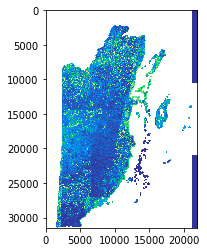

In [24]:
%matplotlib inline
show(mosaic, cmap='terrain')